## This is a Project About Data Science In which i predict about the patient whether he lives or dies according to the ML Parameters

#### Workflow
+ Data Prep
+ EDA
+ Feature Selection
+ Build Model
+ Interpret Model
+ Serialization

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("data/hepatitis.data")
df.head()

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [11]:
col_names = ["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM","SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"]
df = pd.read_csv("data/hepatitis.data",names=col_names)
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [13]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [14]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [16]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [17]:
df = df.replace("?", 0)

In [19]:
sum(df.dtypes == object)

15

In [22]:
df.columns[df.dtypes == 'object'] 

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

In [23]:
df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 
       'alk_phosphate', 'sgot', 'protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices',
       'alk_phosphate', 'sgot', 'protime']].astype(int)

In [24]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid             int32
antivirals          int64
fatigue             int32
malaise             int32
anorexia            int32
liver_big           int32
liver_firm          int32
spleen_palpable     int32
spiders             int32
ascites             int32
varices             int32
bilirubin          object
alk_phosphate       int32
sgot                int32
albumin            object
protime             int32
histology           int64
dtype: object

In [25]:
df[['bilirubin','albumin']] = df[['bilirubin','albumin']].astype(float)

In [26]:
df.count()

class              155
age                155
sex                155
steroid            155
antivirals         155
fatigue            155
malaise            155
anorexia           155
liver_big          155
liver_firm         155
spleen_palpable    155
spiders            155
ascites            155
varices            155
bilirubin          155
alk_phosphate      155
sgot               155
albumin            155
protime            155
histology          155
dtype: int64

In [27]:
### Missing Values
df.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

In [28]:
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [29]:
df['class'].value_counts()

2    123
1     32
Name: class, dtype: int64

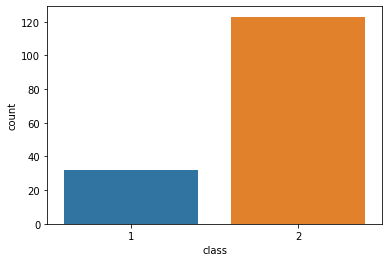

In [31]:
sns.countplot(df['class'])

In [35]:
df['sex'].unique()

array([2, 1], dtype=int64)

In [41]:
df.groupby(['age','sex']).size()

age  sex
7    1      1
20   1      2
     2      1
22   1      1
     2      1
23   1      4
24   1      2
25   1      2
     2      1
26   2      1
27   1      4
28   1      4
     2      1
30   1      7
     2      1
31   1      4
32   1      4
33   1      3
34   1      6
     2      2
35   1      2
36   1      7
37   1      5
38   1      8
39   1      6
40   1      3
41   1      2
     2      1
42   1      5
43   1      1
44   1      5
45   1      4
     2      1
46   1      1
47   1      4
48   1      2
49   1      3
50   1      5
     2      1
51   1      6
52   1      3
53   2      1
54   1      5
56   1      3
57   1      2
58   1      1
     2      1
59   1      1
60   1      1
61   1      3
62   1      1
     2      1
64   1      1
65   1      1
66   1      1
67   2      1
69   2      1
70   1      1
72   1      1
78   1      1
dtype: int64

In [42]:
labels = ["Less than 10","10-20","20-30","30-40","40-50","50-60","60-70","70 and more"]
bins= [0,10,20,30,40,50,60,70,80]
freq_df = df.groupby(pd.cut(df['age'],bins=bins,labels=labels)).size()

In [43]:
freq_df

age
Less than 10     1
10-20            3
20-30           29
30-40           50
40-50           35
50-60           24
60-70           11
70 and more      2
dtype: int64

In [44]:
freq_df = freq_df.reset_index(name="count")

In [45]:
freq_df

,age,count
0,Less than 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70 and more,2


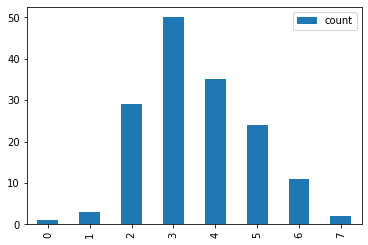

In [46]:
freq_df.plot(kind='bar')

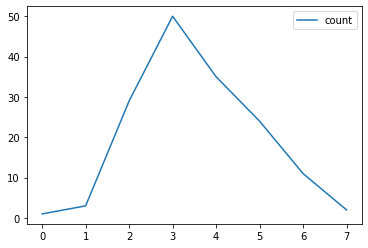

In [47]:
freq_df.plot(kind='line')

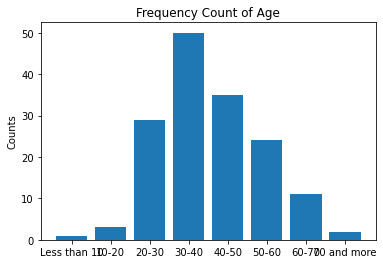

In [48]:
plt.bar(freq_df['age'],freq_df['count'])
plt.ylabel('Counts')
plt.title('Frequency Count of Age')
plt.show()

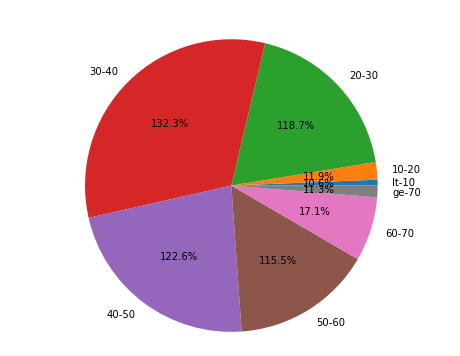

In [55]:
labels = ['lt-10',"10-20","20-30","30-40","40-50","50-60","60-70","ge-70"]
fig1,ax1 = plt.subplots(figsize=(8,6))
ax1.pie(freq_df['count'],labels=labels,autopct='1%.1f%%')
ax1.axis('equal')
plt.title("Pie-Chart representing the age of hepatitis patient",c="white")
plt.show()

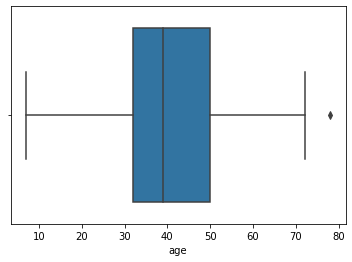

In [57]:
sns.boxplot(df['age'])

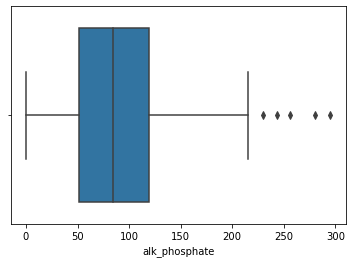

In [58]:
sns.boxplot(df['alk_phosphate'])

In [59]:
df[df['age'] == 78]

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1


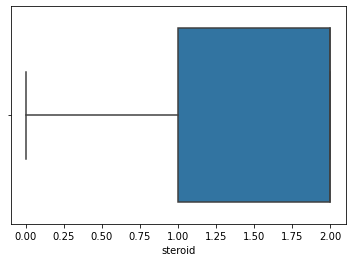

In [60]:
sns.boxplot(df['steroid'])

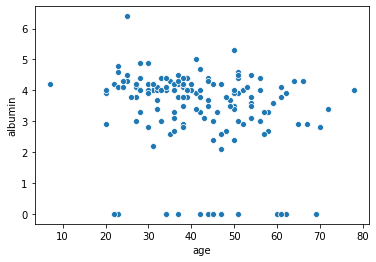

In [61]:
sns.scatterplot(df['age'],df['albumin'])

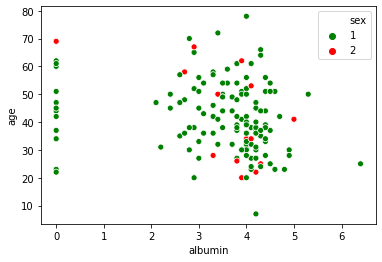

In [62]:
sns.scatterplot(x=df['albumin'],y=df['age'],hue=df['sex'], palette=['green','red'])


In [65]:
from sklearn.feature_selection import SelectKBest,chi2

In [66]:
x = df.drop(['class'],axis=1)
y=df['class']

In [67]:
skb = SelectKBest(score_func=chi2,k=10)
best_feature_fit = skb.fit(x,y)

In [68]:
print("Scores",best_feature_fit.scores_)

Scores [ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247172  17.88270548
  47.38820795   6.87318606 130.18332457   3.01854675]


In [71]:
feature_scores = pd.DataFrame(best_feature_fit.scores_,columns=['Feature_Scores'])

In [72]:
feature_column_names = pd.DataFrame(x.columns,columns=['Feature_name'])
best_feat_df = pd.concat([feature_scores,feature_column_names],axis=1)

In [73]:
best_feat_df

,Feature_Scores,Feature_name
0,28.474819,age
1,0.389483,sex
2,0.399513,steroid
3,0.186342,antivirals
4,2.346432,fatigue
5,2.468032,malaise
6,0.196481,anorexia
7,0.316982,liver_big
8,0.986710,liver_firm
9,0.745352,spleen_palpable


In [76]:
best_feat_df.nlargest(10,'Feature_Scores')

,Feature_Scores,Feature_name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [77]:
best_feat_df.nlargest(12,'Feature_Scores')['Feature_name'].unique()

array(['protime', 'sgot', 'bilirubin', 'age', 'alk_phosphate', 'albumin',
       'spiders', 'histology', 'malaise', 'fatigue', 'ascites', 'varices'],
      dtype=object)

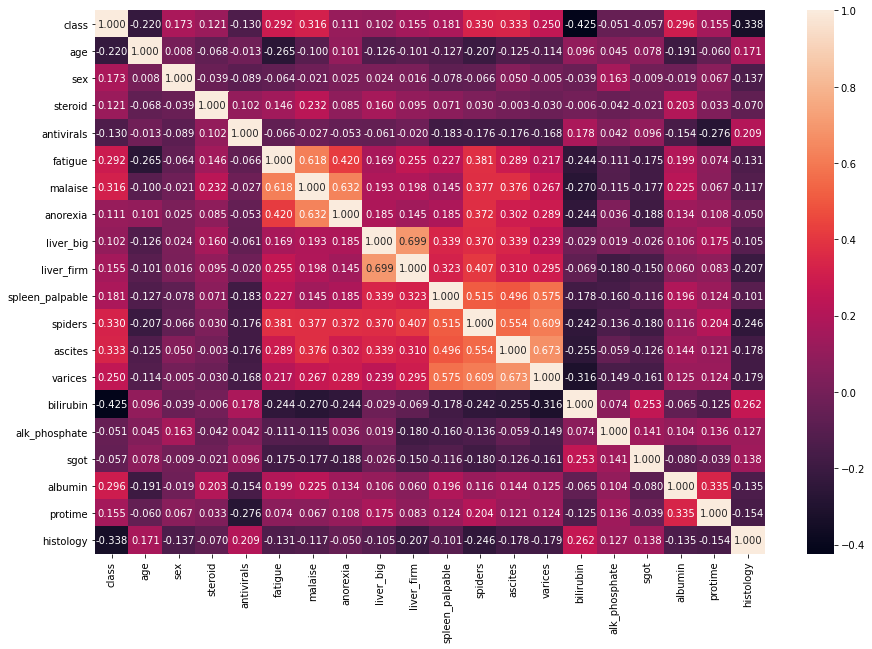

In [83]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, fmt="0.3f")

In [85]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [86]:
log = LogisticRegression()
rfe = RFE(log,8)
rfe_fit = rfe.fit(x,y)


In [87]:
selected_features = pd.DataFrame(rfe_fit.support_,columns=['Selected_Features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_,columns=['ranking_Features'])

In [88]:
rfe_feature_df = pd.concat([feature_column_names,selected_features,ranking_features],axis=1)
rfe_feature_df

,Feature_name,Selected_Features,ranking_Features
0,age,False,8
1,sex,True,1
2,steroid,False,5
3,antivirals,False,9
4,fatigue,True,1
5,malaise,True,1
6,anorexia,True,1
7,liver_big,False,4
8,liver_firm,False,6
9,spleen_palpable,False,7


In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [91]:
from sklearn.ensemble import ExtraTreesClassifier
et_clf = ExtraTreesClassifier()
et_clf.fit(x,y)

ExtraTreesClassifier()

In [92]:
print(et_clf.feature_importances_)


[0.05531616 0.02283447 0.0254115  0.0099126  0.02536528 0.05747401
 0.03183394 0.04562066 0.05394866 0.03654498 0.06815171 0.08897945
 0.05394289 0.0926953  0.06541079 0.04960526 0.07536349 0.07168988
 0.06989897]


In [94]:
feature_imporance_df = pd.Series(et_clf.feature_importances_,index=x.columns)
feature_imporance_df

age                0.055316
sex                0.022834
steroid            0.025411
antivirals         0.009913
fatigue            0.025365
malaise            0.057474
anorexia           0.031834
liver_big          0.045621
liver_firm         0.053949
spleen_palpable    0.036545
spiders            0.068152
ascites            0.088979
varices            0.053943
bilirubin          0.092695
alk_phosphate      0.065411
sgot               0.049605
albumin            0.075363
protime            0.071690
histology          0.069899
dtype: float64

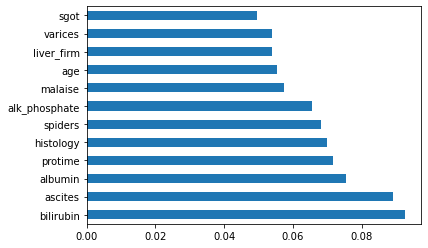

In [95]:
feature_imporance_df.nlargest(12).plot(kind='barh')

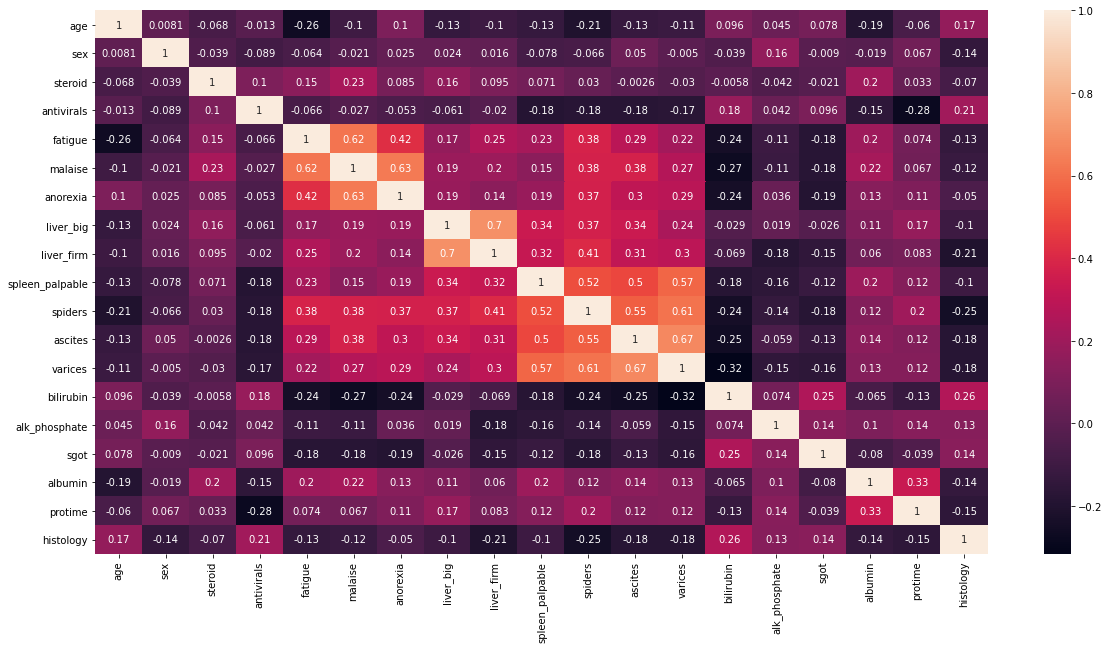

In [96]:
plt.figure(figsize=(20,10))
sns.heatmap(x.corr(),annot=True)
plt.show()

### Model Building
+ Feature & Labels
+ Train/Test/Split
+ LogisticRegression
+ RF
+ DCT
+ Serialize

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [99]:
xfeatures_best = df[['age', 'sex', 'steroid', 'antivirals','fatigue','spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]

In [100]:
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(xfeatures_best,y,test_size=0.20,random_state=0)

In [101]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [102]:
logreg.score(x_test,y_test)

0.8709677419354839

In [103]:
logreg.predict(x_test)

array([2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 2], dtype=int64)

In [104]:
accuracy_score(y_test,logreg.predict(x_test))

0.8709677419354839

In [105]:
model_logit = LogisticRegression()
model_logit.fit(x_train_b,y_train_b)

LogisticRegression()

In [106]:
model_logit.score(x_test_b,y_test_b)

0.8064516129032258

In [107]:
x_test.iloc[1]

age                 50.0
sex                  2.0
steroid              1.0
antivirals           2.0
fatigue              1.0
malaise              2.0
anorexia             2.0
liver_big            1.0
liver_firm           1.0
spleen_palpable      1.0
spiders              1.0
ascites              2.0
varices              2.0
bilirubin            0.9
alk_phosphate      230.0
sgot               117.0
albumin              3.4
protime             41.0
histology            2.0
Name: 90, dtype: float64

In [108]:
logreg.predict(np.array(x_test.iloc[1]).reshape(1,-1))

array([2], dtype=int64)

In [109]:
from sklearn.tree  import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc.score(x_test, y_test)

0.6129032258064516

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test)
accuracy_score(y_test, y_pred)

0.6774193548387096

In [121]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
accuracy_score(y_test, y_pred)

0.8064516129032258

In [125]:
rfc_b = RandomForestClassifier()
rfc_b.fit(x_train_b, y_train_b)
y_pred_b = rfc_b.predict(x_test_b)
accuracy_score(y_test_b, y_pred_b)

0.7741935483870968

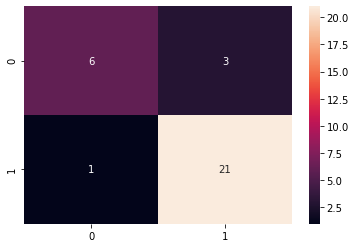

In [128]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, logreg.predict(x_test))
sns.heatmap(cm,annot=True)

In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg.predict(x_test)))

              precision    recall  f1-score   support

           1       0.86      0.67      0.75         9
           2       0.88      0.95      0.91        22

    accuracy                           0.87        31
   macro avg       0.87      0.81      0.83        31
weighted avg       0.87      0.87      0.87        31



In [130]:
class_names = ["Die(1)", "Live(2)"]

In [132]:
print(classification_report(y_test, logreg.predict(x_test), target_names=class_names))

              precision    recall  f1-score   support

      Die(1)       0.86      0.67      0.75         9
     Live(2)       0.88      0.95      0.91        22

    accuracy                           0.87        31
   macro avg       0.87      0.81      0.83        31
weighted avg       0.87      0.87      0.87        31



In [135]:
import pickle
filename = 'hepatitis-prediction-logreg-model.pkl'

In [138]:
pickle.dump(logreg, open(filename, 'wb'))

In [140]:
import eli5
eli5.show_weights(logreg,top=10)